In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class VisualizePreTrainedLLMResults:
    def __init__(self, json_files):
        self.json_files = json_files

    def load_metrics(self, file_path):
        with open(file_path, 'r') as f:
            return json.load(f)

    def analyze_metrics(self, metrics, model_name):
        epochs = [m['epoch'] for m in metrics['epoch_metrics']]
        train_losses = [m['train_loss'] for m in metrics['epoch_metrics']]
        test_losses = [m['test_loss'] for m in metrics['epoch_metrics']]
        train_accuracies = [m['train_accuracy'] for m in metrics['epoch_metrics']]
        test_accuracies = [m['test_accuracy'] for m in metrics['epoch_metrics']]
        train_precisions = [m['train_precision'] for m in metrics['epoch_metrics']]
        test_precisions = [m['test_precision'] for m in metrics['epoch_metrics']]
        train_recalls = [m['train_recall'] for m in metrics['epoch_metrics']]
        test_recalls = [m['test_recall'] for m in metrics['epoch_metrics']]
        train_f1s = [m['train_f1'] for m in metrics['epoch_metrics']]
        test_f1s = [m['test_f1'] for m in metrics['epoch_metrics']]

        model_display_name = model_name.split('/')[-1]

        print(f"\nModel: {model_display_name}")
        print(f"Best Parameters: {metrics['best_params']}")
        print(f"Final Test Loss: {metrics['test_loss']}")
        print(f"Final Test Accuracy: {metrics['accuracy']}")
        print(f"Final Test Precision: {metrics['precision']}")
        print(f"Final Test Recall: {metrics['recall']}")
        print(f"Final Test F1 Score: {metrics['f1']}")

        plt.figure(figsize=(18, 12))

        plt.subplot(2, 3, 1)
        plt.plot(epochs, train_losses, label='Train Loss', color='blue')
        plt.plot(epochs, test_losses, label='Test Loss', color='orange')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'{model_display_name} - Loss')
        plt.legend()

        plt.subplot(2, 3, 2)
        plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
        plt.plot(epochs, test_accuracies, label='Test Accuracy', color='orange')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'{model_display_name} - Accuracy')
        plt.legend()

        plt.subplot(2, 3, 3)
        plt.plot(epochs, train_precisions, label='Train Precision', color='blue')
        plt.plot(epochs, test_precisions, label='Test Precision', color='orange')
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.title(f'{model_display_name} - Precision')
        plt.legend()

        plt.subplot(2, 3, 4)
        plt.plot(epochs, train_recalls, label='Train Recall', color='blue')
        plt.plot(epochs, test_recalls, label='Test Recall', color='orange')
        plt.xlabel('Epochs')
        plt.ylabel('Recall')
        plt.title(f'{model_display_name} - Recall')
        plt.legend()

        plt.subplot(2, 3, 5)
        plt.plot(epochs, train_f1s, label='Train F1 Score', color='blue')
        plt.plot(epochs, test_f1s, label='Test F1 Score', color='orange')
        plt.xlabel('Epochs')
        plt.ylabel('F1 Score')
        plt.title(f'{model_display_name} - F1 Score')
        plt.legend()

        # Gráfico de barras para as métricas finais com paleta de cores opacas
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        test_metrics = [metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1']]
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Paleta de cores opacas

        plt.subplot(2, 3, 6)
        bars = plt.bar(metrics_names, test_metrics, color=colors, alpha=0.7)
        plt.xlabel('Metrics')
        plt.ylabel('Values')
        plt.title(f'{model_display_name} - Final Test Metrics')
        plt.ylim(0, 1)

        # Add values on top of the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.savefig(f'{model_display_name}_metrics.png')
        plt.show()

    def run_analysis(self):
        metrics_data = []

        for file in self.json_files:
            file_path = os.path.join('./', file)
            if os.path.exists(file_path):
                metrics = self.load_metrics(file_path)
                model_name = file.split('metrics_')[1].split('.json')[0]  # Pega o nome completo do modelo
                self.analyze_metrics(metrics, model_name)
                metrics_data.append((model_name, metrics))
            else:
                print(f"File {file_path} does not exist.")

        # Gerar um relatório consolidado
        report = {
            model: {
                "best_params": metrics["best_params"],
                "final_metrics": {
                    "test_loss": metrics["test_loss"],
                    "accuracy": metrics["accuracy"],
                    "precision": metrics["precision"],
                    "recall": metrics["recall"],
                    "f1": metrics["f1"]
                }
            }
            for model, metrics in metrics_data
        }

        with open('consolidated_report.json', 'w') as f:
            json.dump(report, f, indent=4)

        print("\nConsolidated report saved as 'consolidated_report.json'")


Model: DeepChem_ChemBERTa-10M-MLM
Best Parameters: {'learning_rate': 5.0559185984822474e-05, 'batch_size': 21, 'epochs': 6}
Final Test Loss: 1.0003101945822415
Final Test Accuracy: 0.6052983176979326
Final Test Precision: 0.6202867008500836
Final Test Recall: 0.6052983176979326
Final Test F1 Score: 0.6003399636815735


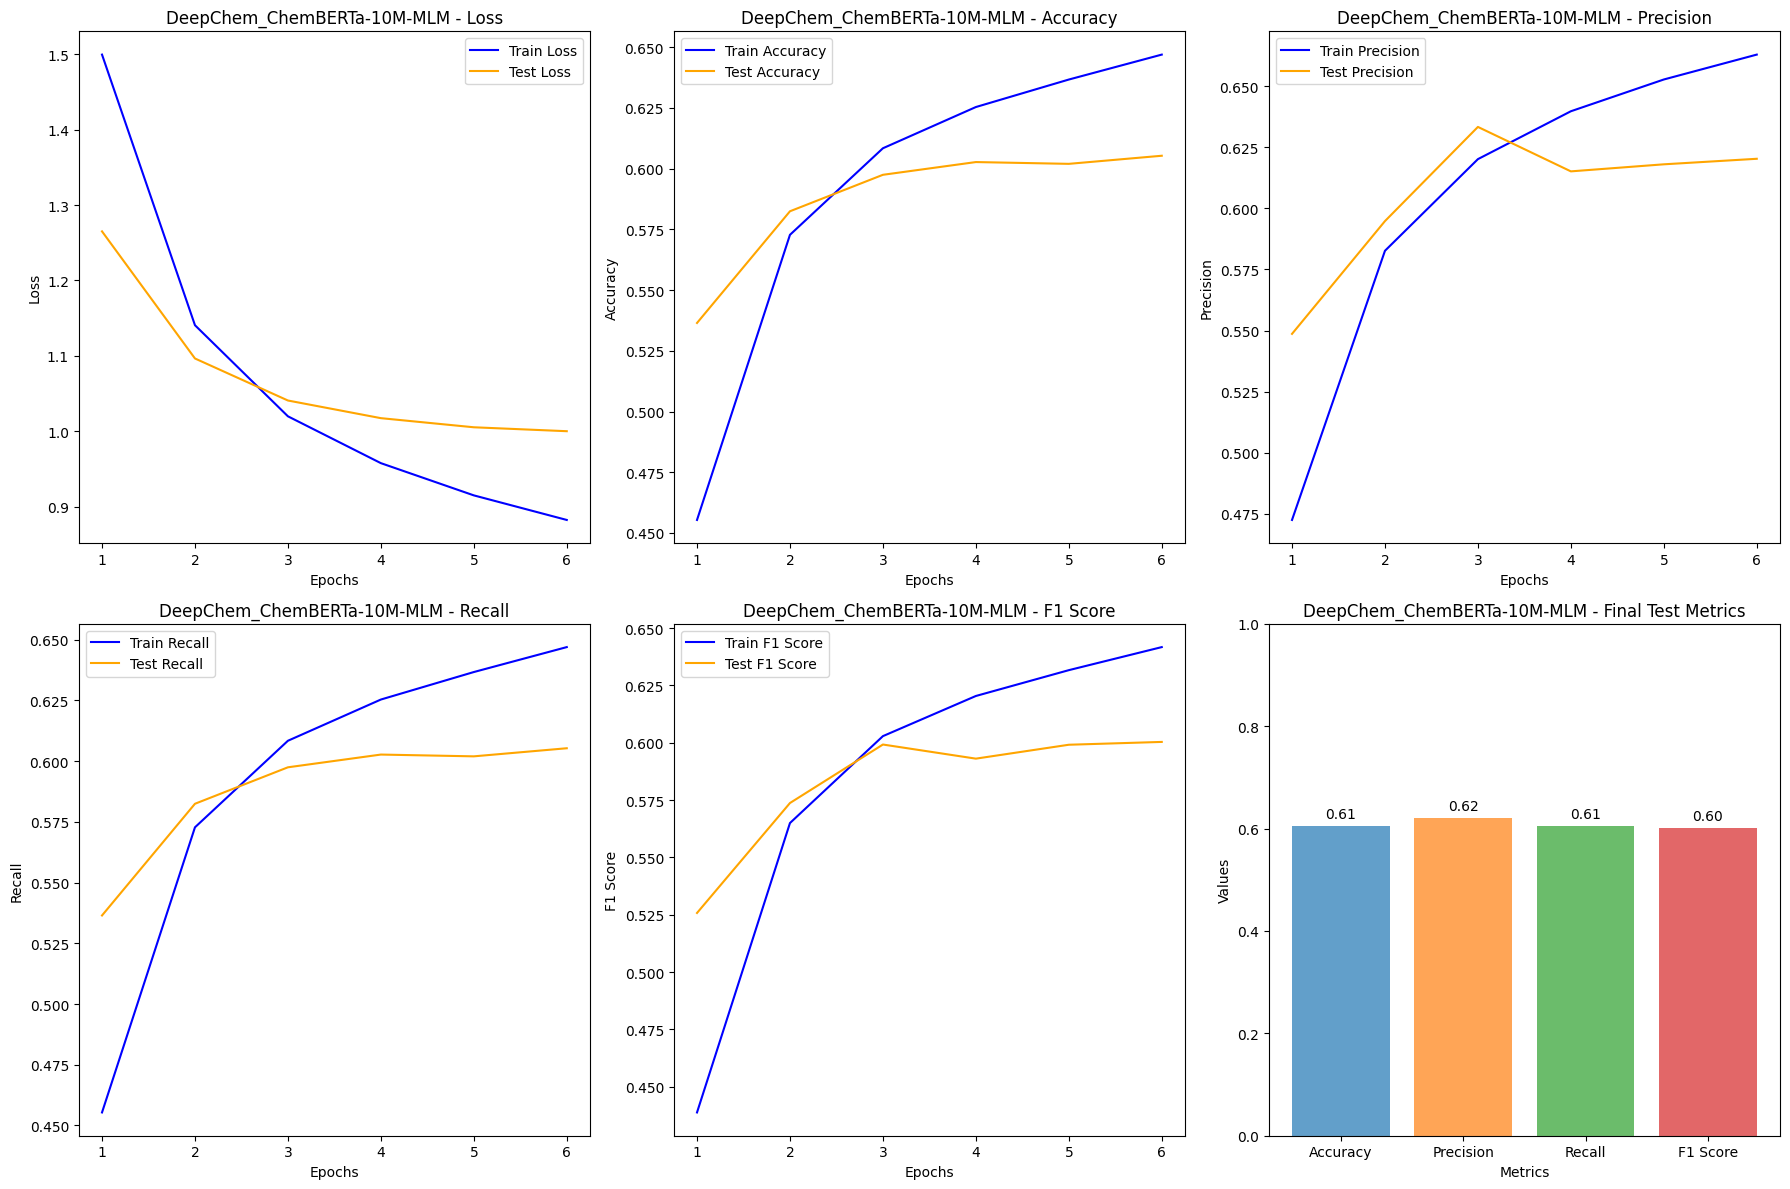


Model: DeepChem_ChemBERTa-10M-MTR
Best Parameters: {'learning_rate': 6.123847148317998e-05, 'batch_size': 61, 'epochs': 12}
Final Test Loss: 1.0103323932495718
Final Test Accuracy: 0.6024106770870746
Final Test Precision: 0.6199376812675617
Final Test Recall: 0.6024106770870746
Final Test F1 Score: 0.5965965672972684


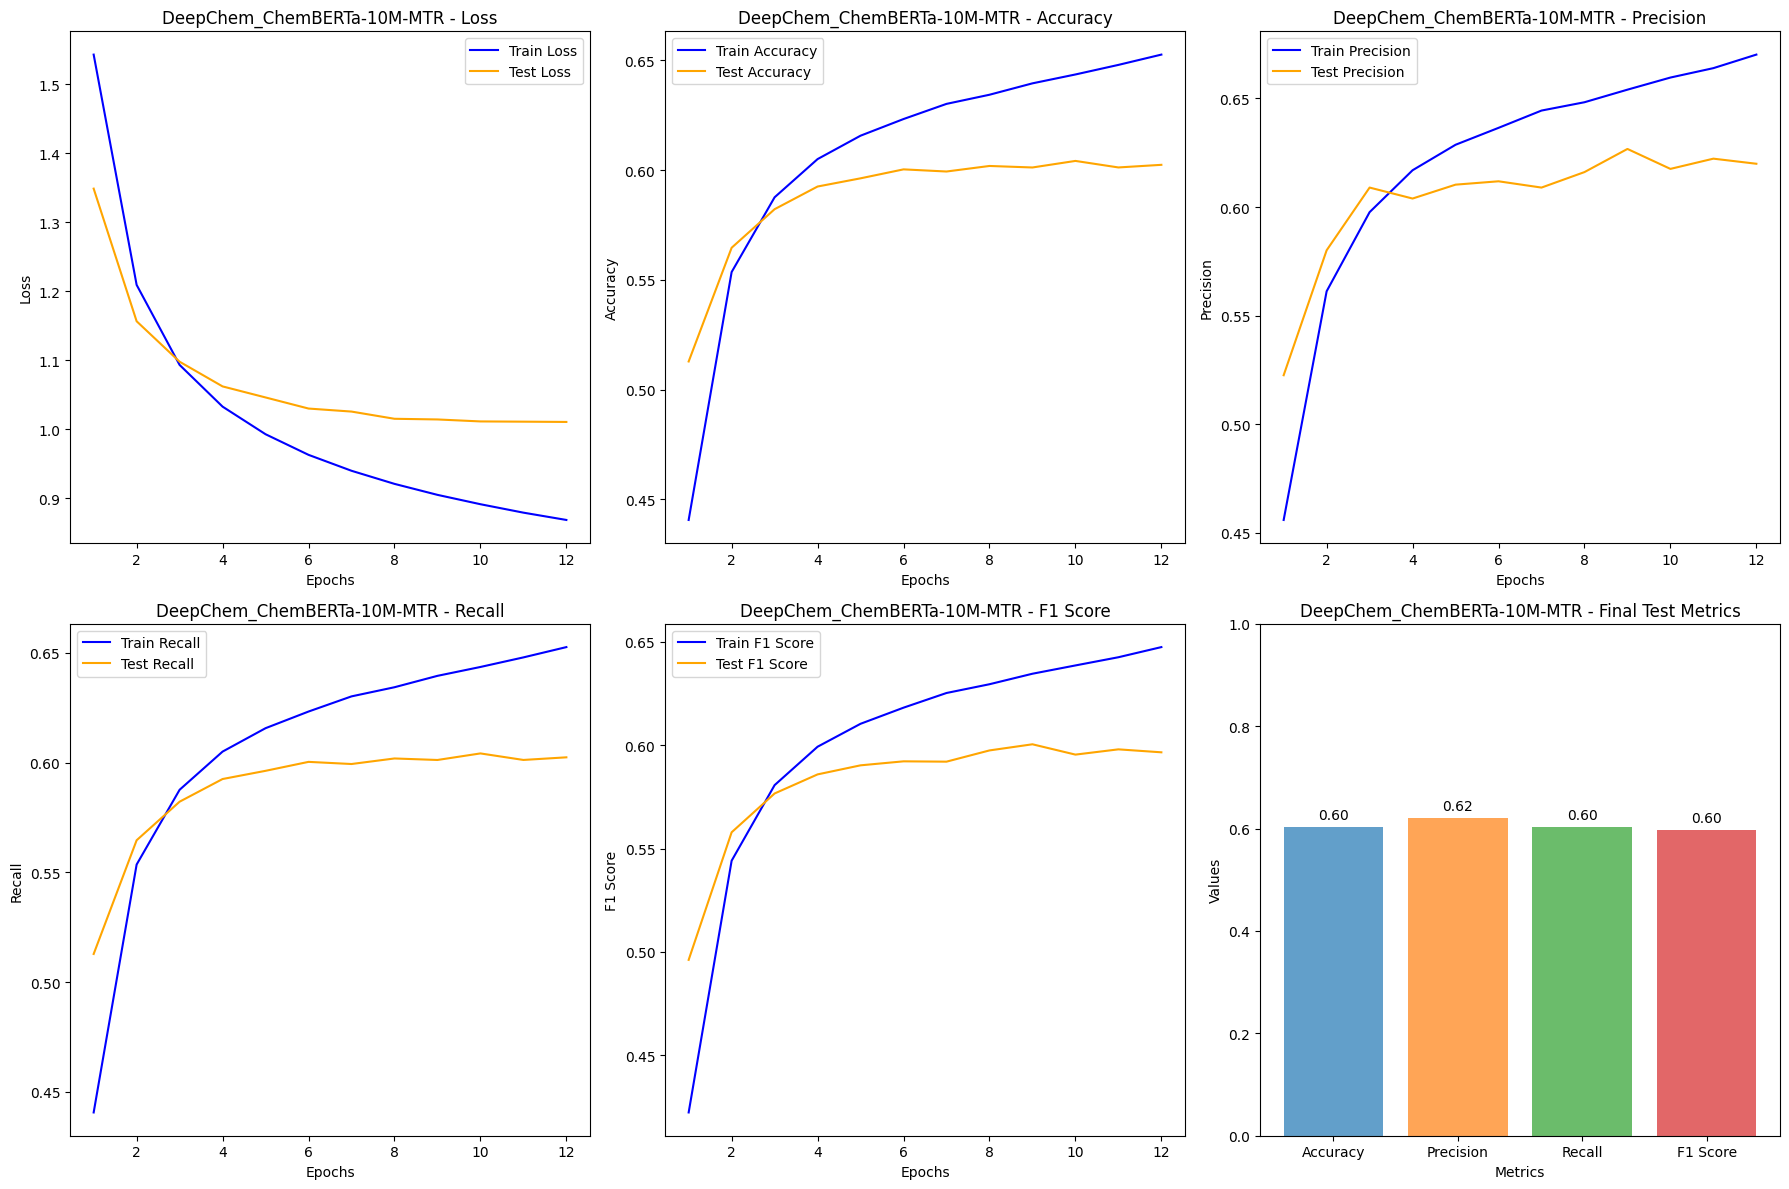


Model: DeepChem_ChemBERTa-77M-MTR
Best Parameters: {'learning_rate': 9.713627554540556e-05, 'batch_size': 33, 'epochs': 8}
Final Test Loss: 1.0033663783028228
Final Test Accuracy: 0.6049966239027684
Final Test Precision: 0.6234327597681866
Final Test Recall: 0.6049966239027684
Final Test F1 Score: 0.599822473724865


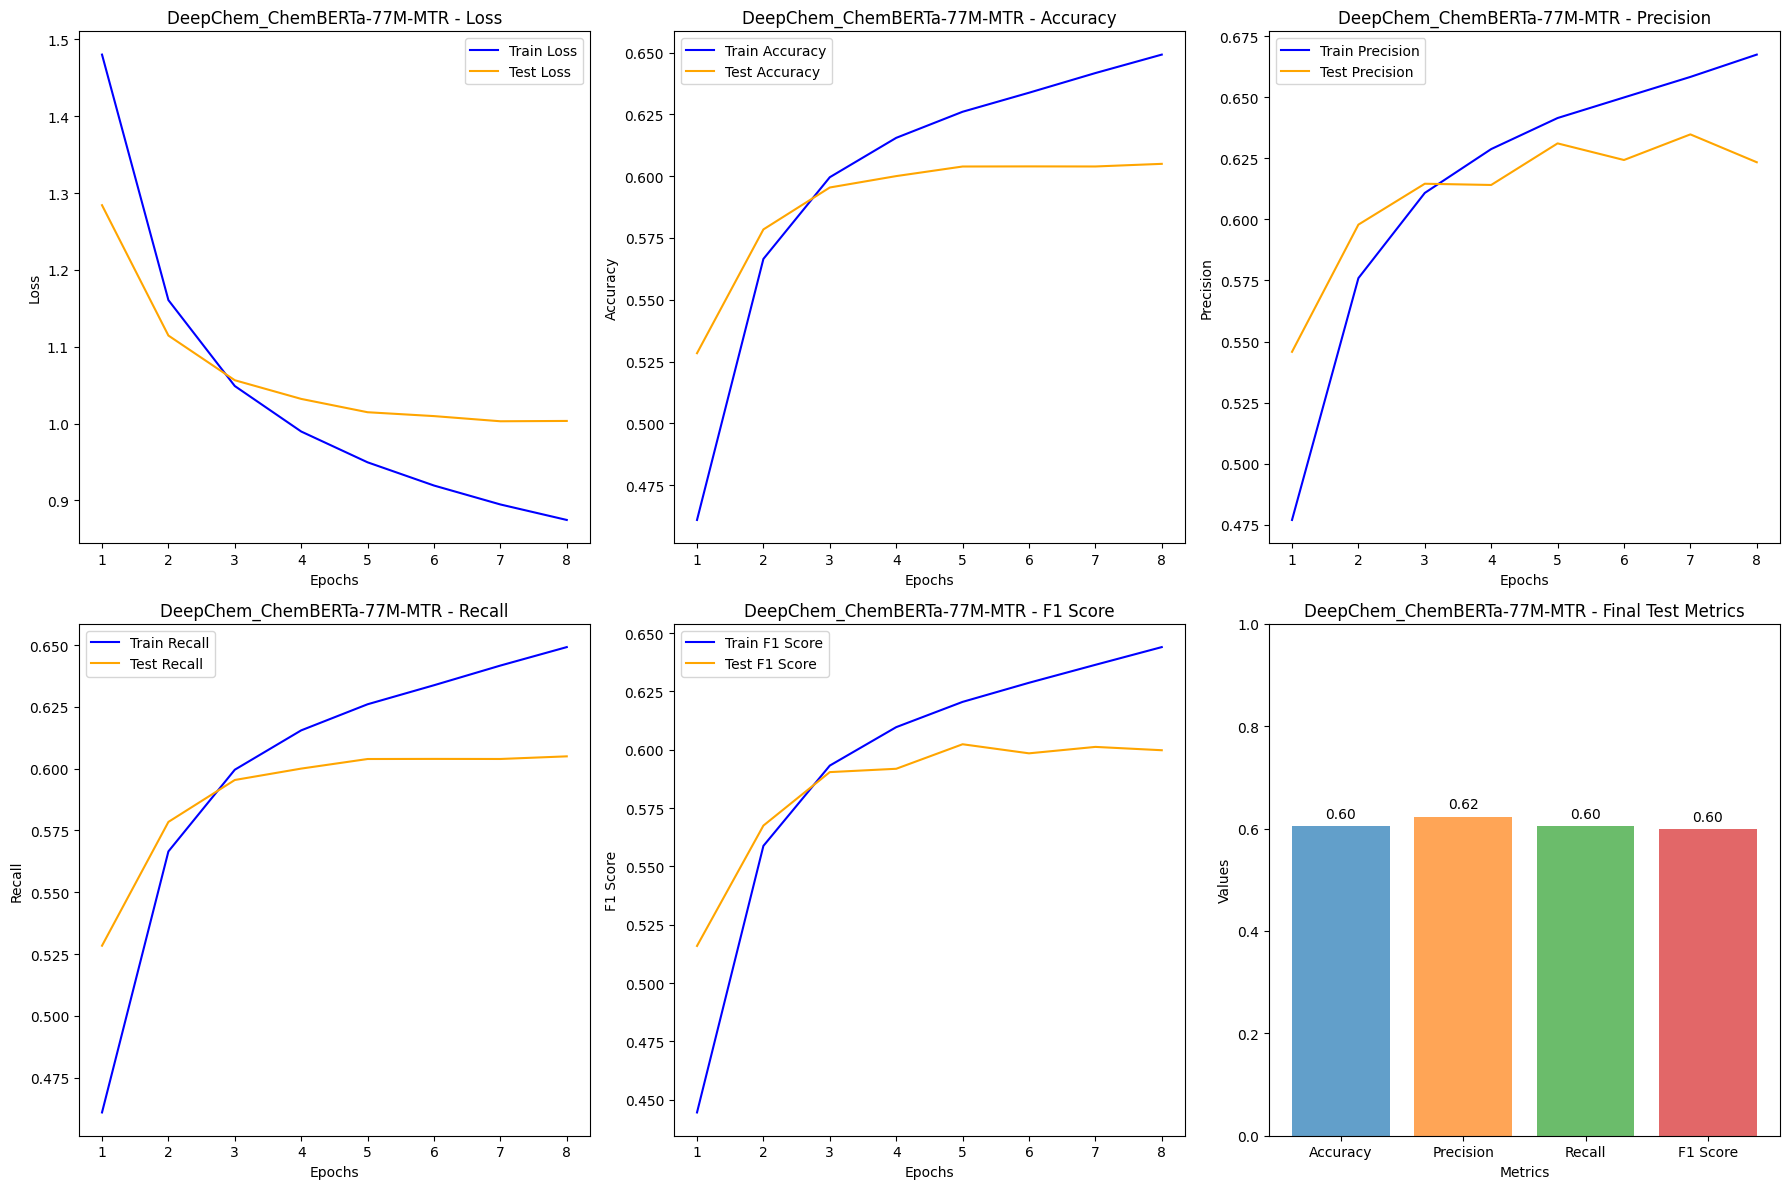


Consolidated report saved as 'consolidated_report.json'


In [3]:
if __name__ == "__main__":
    json_files = ['metrics_DeepChem_ChemBERTa-10M-MLM.json', 
                  'metrics_DeepChem_ChemBERTa-10M-MTR.json', 
                  'metrics_DeepChem_ChemBERTa-77M-MTR.json']
    visualizer = VisualizePreTrainedLLMResults(json_files)
    visualizer.run_analysis()